Let's look at a sample of $W$ boson candidates, particularly those that decay to a muon $\mu$ and a neutrino $\nu$. A selection has already been performed on the SingleMu sample collected by the CMS Experiment in 2011. 

(Most selections contained in this notebook come from those specified and described in "Measurement of the Inclusive W and Z Production Cross Sections in pp Collisions at $\sqrt{s}$ = 7 TeV" by the CMS Collaboration [arXiv:1107.4789].)

The selection code is here: https://github.com/tpmccauley/Wmunu-filter

An event is kept if there is one (and only one) global muon in the event that satisfies: $p_{t}$ > 25.0 GeV and |$\eta$| < 2.1. Furthermore, the event is rejected if there is another global muon in the event with $p_{t}$ > 10 GeV in the acceptance region $|\eta|$ < 2.4.

We output the following information to a csv (comma-separated-variable) file:

Run,Event,pt,eta,phi,Q,chiSq,dxy,iso,MET,phiMET

Where
* Run, Event are the run and event numbers, respectively
* pt is the transverse momentum $p_{t}$ of the muon
* eta is the pseudorapidity of the muon: $\eta$
* phi is the $\phi$ angle of the muon direction
* Q is the charge of the muon
* chiSq is the $\chi^{2}$ per degree-of-freedom of the global muon fit
* dxy is the impact parameter in the transverse plane: $d_{xy}$
* iso is the combined isolation: $I_{comb}$ = $I_{track}$ + $I_{ECAL}$ + $I_{HCAL}$
* MET is the missing transverse energy
* phiMET is the $\phi$ angle of the MET

Let's read in the csv file, make a data frame, calculate the transverse mass $M_{T}$, where 

$M_{T} = \sqrt{2p_{t}MET(1 - \cos{\Delta\phi})}$

and add a Mt column to the data frame

In [67]:
import math
import numpy as np
import pandas as pd

df = pd.read_csv('./data/Wmunu_Run2011A.csv')
df['Mt'] = np.sqrt(2*df['pt']*df['MET']*(1-np.cos(df['phi']-df['phiMET'])))

df.head()

,Run,Event,pt,eta,phi,Q,chiSq,dxy,iso,MET,phiMET,Mt
0,173389,489963747,29.3153,-0.139250,1.356110,1,0.845578,-0.060012,0.00000,30.66700,-2.130810,59.075395
1,173389,490024840,44.1461,-1.359000,-0.538965,1,1.294310,-0.012581,26.34230,27.95210,-2.668610,61.453123
2,173389,490102189,42.7895,-1.019350,2.339020,-1,0.807800,-0.084001,2.97476,5.15651,0.306059,25.259728
3,173389,490092121,31.2215,-0.127033,-0.488923,-1,109.949000,0.072264,56.48970,4.21427,-0.116569,4.246511
4,173389,490193981,36.9668,1.855660,1.377200,1,1.059700,-0.067624,41.49100,20.99630,-1.625060,55.584353


In [68]:
MT_hist = np.histogram(df.Mt, bins=30, range=(0,150))

The histogram returns the bin edges and the numbers within the bins which we can output:

In [69]:
hist, bins = MT_hist
print(hist)
print(bins)

[ 9762  9488  8641  8124  7920  7617  7640  7390  7461  7517  8054  8555
  9532  9849 10039  9292  7416  4982  2851  1465   771   397   240   143
    92    61    53    35    31    21]
[   0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
   60.   65.   70.   75.   80.   85.   90.   95.  100.  105.  110.  115.
  120.  125.  130.  135.  140.  145.  150.]


Of course it's better view this graphically so let's plot it:

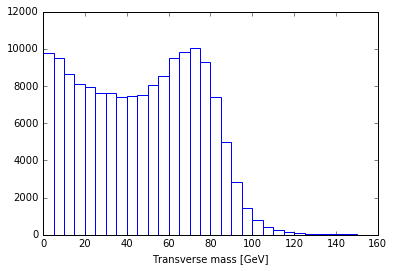

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

hist, bins = MT_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.xlabel('Transverse mass [GeV]')
plt.show()


What do the variables $\chi^{2}/ndof$, $d_{xy}$, and iso look like?

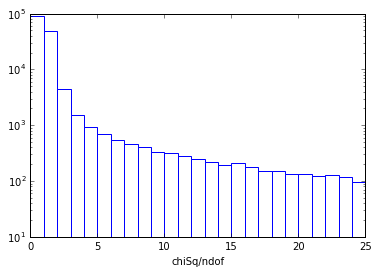

In [71]:
chi2_hist = np.histogram(df['chiSq'], bins=25, range=(0,25))

hist, bins = chi2_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.xlabel('chiSq/ndof')
plt.yscale('log')
plt.show()

In [72]:
w = [dxy for dxy in df['dxy']]

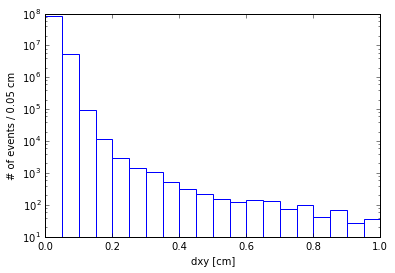

In [73]:
nbins = 20
weights = [nbins/np.log(10)/dxy for dxy in df['dxy']]
dxy_hist = np.histogram(df['dxy'], bins=nbins, weights=weights, range=(0,1))

hist, bins = dxy_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.xlabel('dxy [cm]')
plt.ylabel('# of events / 0.05 cm')
plt.yscale('log')
plt.show()

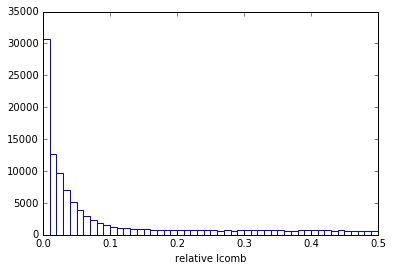

In [74]:
iso_hist = np.histogram(df['iso']/df['pt'], bins=50, range=(0,0.5))

hist, bins = iso_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.xlabel('relative Icomb')
plt.show()

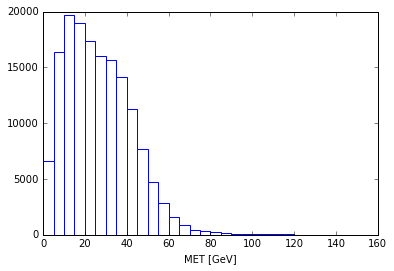

In [75]:
MET_hist = np.histogram(df['MET'], bins=30, range=(0,150))

hist, bins = MET_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.xlabel('MET [GeV]')
plt.show()

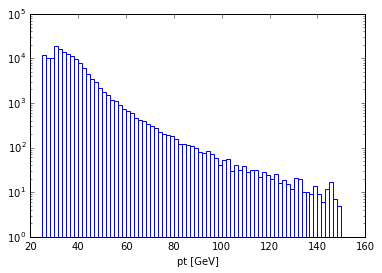

In [76]:
pt_hist = np.histogram(df.pt, bins=75, range=(25,150))

hist, bins = pt_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.yscale('log')
plt.xlabel('pt [GeV]')
plt.show()

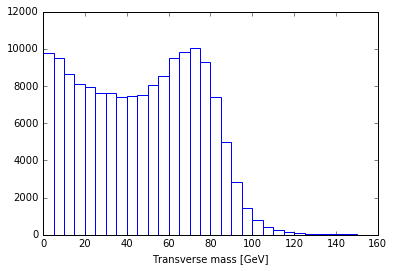

In [77]:
hist, bins = MT_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.xlabel('Transverse mass [GeV]')
plt.show()

What does the transverse mass look like if we apply the following selections?
* $\chi^{2}/ndof$ < 10
* $d_{xy}$ < 0.2 cm
* $I^{rel}_{comb}$ < 0.1 

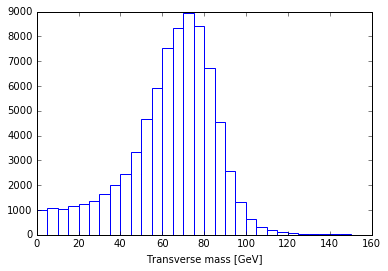

In [78]:
nbins = 30
select = df[(df.chiSq < 10) & (df.dxy < 0.2) & (df.iso/df.pt < 0.1)]

MT_hist = np.histogram(select.Mt, bins=nbins, range=(0,150))

hist, bins = MT_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.xlabel('Transverse mass [GeV]')
plt.show()

How many events do we have?

In [66]:
len(select)

76880